In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint
import tensorflow_addons as tfa
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


#required libraries
import cv2

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
data_train = []
type_of_disease =['Non-Nodule', 'Nodule']
data_directory = '/content/drive/MyDrive/Luna16'
train_directory = os.path.join(data_directory)

for id, sp in enumerate(type_of_disease):
    for file in os.listdir(os.path.join(train_directory, sp)):
        data_train.append(['{}/{}/{}'.format(data_directory,sp, file), id, sp])

train = pd.DataFrame(data_train, columns=['Image', 'Class ID','Type of Disease'])

In [ ]:
del data_train

In [ ]:
train.head()

,Image,Class ID,Type of Disease
0,/content/drive/MyDrive/Luna16/Non-Nodule/img_0...,0,Non-Nodule
1,/content/drive/MyDrive/Luna16/Non-Nodule/img_1...,0,Non-Nodule
2,/content/drive/MyDrive/Luna16/Non-Nodule/img_2...,0,Non-Nodule
3,/content/drive/MyDrive/Luna16/Non-Nodule/img_3...,0,Non-Nodule
4,/content/drive/MyDrive/Luna16/Non-Nodule/img_4...,0,Non-Nodule


In [ ]:
SEED = 42
train = train.sample(frac=1, random_state=SEED)
train.index = np.arange(len(train))

In [ ]:
train.head()

,Image,Class ID,Type of Disease
0,/content/drive/MyDrive/Luna16/Non-Nodule/img_4...,0,Non-Nodule
1,/content/drive/MyDrive/Luna16/Nodule/img_152.jpg,1,Nodule
2,/content/drive/MyDrive/Luna16/Non-Nodule/img_5...,0,Non-Nodule
3,/content/drive/MyDrive/Luna16/Nodule/img_220.jpg,1,Nodule
4,/content/drive/MyDrive/Luna16/Nodule/img_70.jpg,1,Nodule


In [ ]:
SIZE_OF_IMAGE = 256
def read_image(imagepath):
    return cv2.imread(imagepath)

def resize_image(image, image_Size):
    return cv2.resize(image.copy(), image_Size, interpolation=cv2.INTER_AREA)

In [ ]:
from tqdm import tqdm
x_train = np.zeros((train.shape[0], SIZE_OF_IMAGE, SIZE_OF_IMAGE, 3))

for i, file in tqdm(enumerate(train['Image'].values)):
    image = read_image(file)

    if image is not None:
        x_train[i] = resize_image(image,(SIZE_OF_IMAGE, SIZE_OF_IMAGE))

X_Train = x_train / 255
print('Train shape: {}'.format(X_Train.shape))

1097it [06:25,  2.85it/s]


Train shape: (1097, 256, 256, 3)


In [ ]:
del x_train

In [ ]:
from keras.utils import to_categorical
y_train = train['Class ID'].values
y_train2 = to_categorical(y_train, num_classes=2)
print(y_train2)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
from sklearn.model_selection import train_test_split
BATCH_SIZE = 32

x_train, x_test, y_train, y_test = train_test_split(X_Train,y_train, test_size=0.2, random_state=SEED)

In [ ]:
num_classes = 2
input_shape = (256, 256, 3)

#(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (877, 256, 256, 3) - y_train shape: (877,)
x_test shape: (220, 256, 256, 3) - y_test shape: (220,)


In [ ]:
print(x_train[8])

[[[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 ...

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]


In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 4
num_epochs = 100
image_size = 256  # We'll resize input images to this size
patch_size = 16  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 6
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches


Image size: 256 X 256
Patch size: 16 X 16
Patches per image: 256
Elements per patch: 768


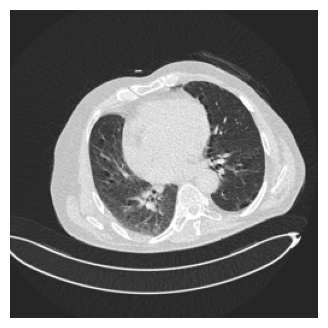

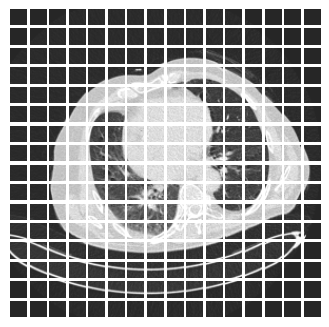

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[5]
plt.imshow(image)
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy())
    plt.axis("off")

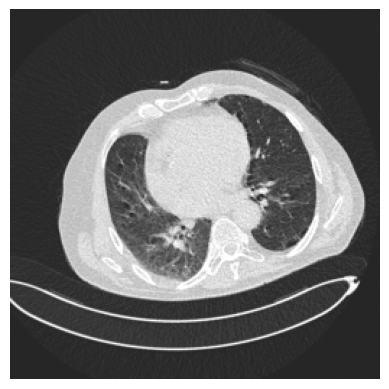

In [ ]:
image = x_train[5]

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()


In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
def avian_optimization(num_agents, max_iter, dim, obj_function):
    birds_position = np.random.uniform(0.0001, 0.001, (num_agents, dim))
    fitness = np.array([obj_function(bird)[0] for bird in birds_position])  # Use only accuracy for optimization

    best_index = np.argmax(fitness)  # Get the index of the best performance
    best_bird = birds_position[best_index]
    best_fitness = fitness[best_index]

    for t in range(max_iter):
        for i in range(num_agents):
            random_values = np.random.uniform(-1, 1, dim)

            if np.random.rand() < 0.5:
                birds_position[i] += random_values * (best_bird - birds_position[i])
            else:
                birds_position[i] += random_values * (best_bird + birds_position[i])

            current_fitness = fitness[i]
            if current_fitness < fitness[i]:
                fitness[i] = current_fitness
                if current_fitness < best_fitness:
                    best_bird = birds_position[i]
                    best_fitness = current_fitness

    return best_bird, best_fitness

In [ ]:
def objective_function(hyperparameters):
    learning_rate, weight_decay = hyperparameters
    model = create_vit_classifier()
    optimizer = tfa.optimizers.AdamW(
          learning_rate=learning_rate, weight_decay=weight_decay
    )
    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
        ],
    )
    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=1,
        validation_split=0.1,
    )
    _, accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    return accuracy,model


In [ ]:
num_agents = 5
max_iterations = 30
dim = 2
print(f"Initializing with dimensionality: {dim}")
best_hyperparameters, best_performance= avian_optimization(num_agents, max_iterations, dim, objective_function)
print("Best Hyperparameters:", best_hyperparameters)
print("Best Performance:", best_performance)

Initializing with dimensionality: 2
7/7 [==============================] - 2s 64ms/step - loss: 2.7245 - accuracy: 0.6318
Test accuracy: 63.18%
7/7 [==============================] - 2s 66ms/step - loss: 0.7687 - accuracy: 0.7227
Test accuracy: 72.27%
7/7 [==============================] - 2s 66ms/step - loss: 6.3407 - accuracy: 0.4409
Test accuracy: 44.09%
7/7 [==============================] - 2s 67ms/step - loss: 1.7550 - accuracy: 0.5591
Test accuracy: 55.91%
7/7 [==============================] - 2s 76ms/step - loss: 0.5209 - accuracy: 0.7545
Test accuracy: 75.45%
Best Hyperparameters: [-2.3386695e-06 -1.4981601e-02]
Best Performance: 0.7545454502105713


In [ ]:
learning_rate , weight_decay = hyperparameters
model = create_vit_classifier()
optimizer = tfa.optimizers.AdamW(
      learning_rate=learning_rate, weight_decay=weight_decay
)
model.compile(
    optimizer=optimizer,
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
    ],
)

checkpoint_filepath = "/tmp/checkpoint"
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    checkpoint_filepath,
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True,
)
mc = ModelCheckpoint('test_model.h5', monitor='val_accuracy', mode='max', verbose=1,save_best_only=True)
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=100,
    validation_split=0.1,
    callbacks=[checkpoint_callback],
)
model.load_weights(checkpoint_filepath)
_, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")


Epoch 1/100
198/198 [==============================] - 24s 72ms/step - loss: 9.6340 - accuracy: 0.6223 - val_loss: 1.5049 - val_accuracy: 0.7386
Epoch 2/100
198/198 [==============================] - 10s 52ms/step - loss: 2.3195 - accuracy: 0.6122 - val_loss: 0.8041 - val_accuracy: 0.6477
Epoch 3/100
198/198 [==============================] - 12s 59ms/step - loss: 0.7941 - accuracy: 0.6401 - val_loss: 0.4698 - val_accuracy: 0.7386
Epoch 4/100
198/198 [==============================] - 13s 63ms/step - loss: 0.6036 - accuracy: 0.7186 - val_loss: 0.4816 - val_accuracy: 0.7955
Epoch 5/100
198/198 [==============================] - 13s 64ms/step - loss: 0.6366 - accuracy: 0.7022 - val_loss: 0.4726 - val_accuracy: 0.8068
Epoch 6/100
198/198 [==============================] - 10s 52ms/step - loss: 0.5700 - accuracy: 0.7440 - val_loss: 0.4976 - val_accuracy: 0.6932
Epoch 7/100
198/198 [==============================] - 12s 62ms/step - loss: 0.5729 - accuracy: 0.7402 - val_loss: 0.3646 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 2s 73ms/step - loss: 0.1175 - accuracy: 0.9682
Test accuracy: 96.82%


In [ ]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 data_augmentation (Sequent  (None, 256, 256, 3)          7         ['input_6[0][0]']             
 ial)                                                                                             
                                                                                                  
 patches_6 (Patches)         (None, None, 768)            0         ['data_augmentation[5][0]']   
                                                                                                  
 patch_encoder_5 (PatchEnco  (None, 256, 64)              65600     ['patches_6[0][0]']     

In [ ]:
print(f"Train accuracy: {max(history.history['accuracy']) * 100}%")
print(f"Test accuracy: {accuracy * 100}%")

Train accuracy: 96.30304511528016%
Test accuracy: 97.18817889213562%


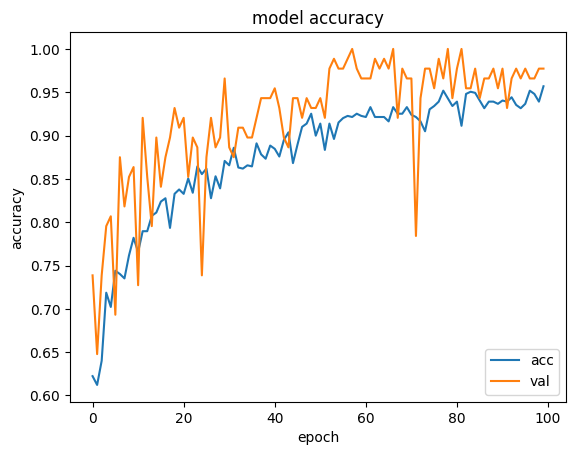

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel ('epoch')
plt.legend(['acc','val'], loc='lower right')
plt.show()

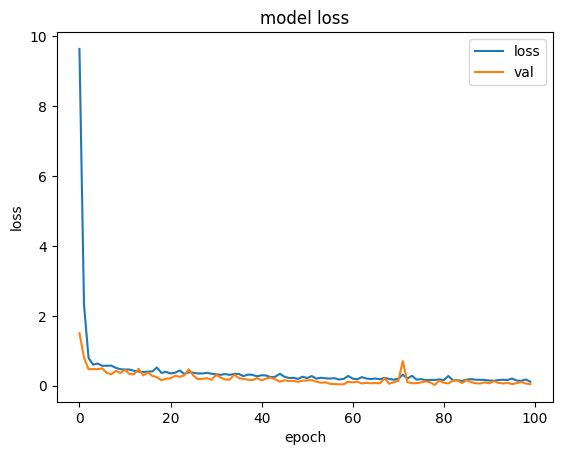

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel ('epoch')
plt.legend(['loss','val'], loc='upper right')
plt.show()

In [ ]:
x = x_test
true_labels = y_test
predictions = []
for i in x:
    resized_image = tf.image.resize(
      tf.convert_to_tensor([i]), size=(image_size, image_size)
    )
    pred= model.predict(resized_image,verbose = 0)
    res = np.argmax(pred)
    predictions.append(res)

Confusion matrix, without normalization
[[ 81   4]
 [  3 132]]
Accuracy: 0.968
Precision: 0.971
Recall: 0.968
F-Measure: 0.968


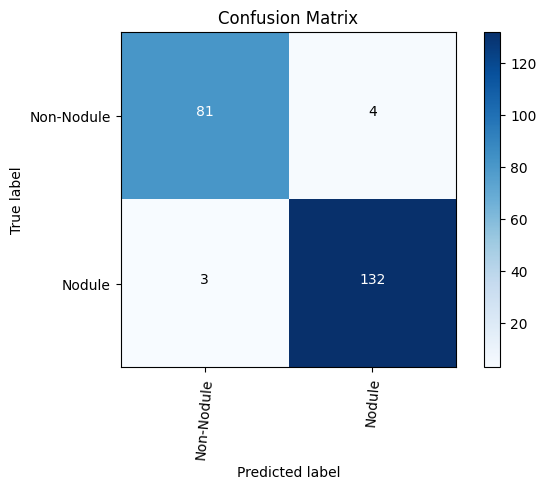

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=85)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=predictions)
cm_plot_labels = ["Non-Nodule","Nodule"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,predictions)
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,predictions,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,predictions, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,predictions, average='micro')
print('F-Measure: %.3f' % score)

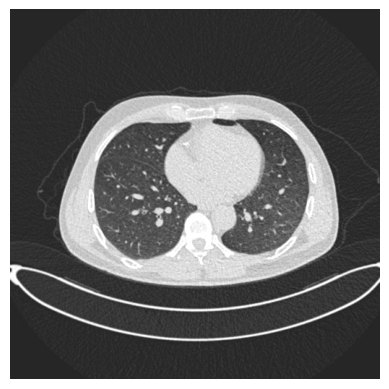

Non-Nodule


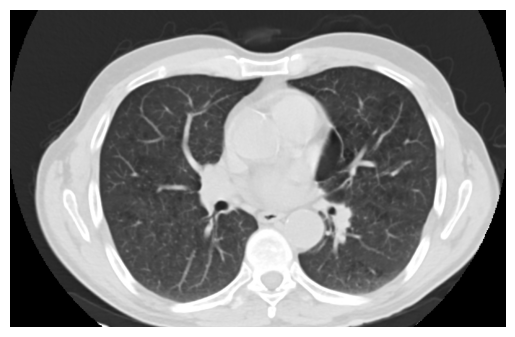

Nodule


In [ ]:
image = read_image('/content/drive/MyDrive/Luna16/Non-Nodule/img_4.jpg')
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()
resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
pred = model.predict(resized_image,verbose=0)
res = np.argmax(pred)
print(type_of_disease[res])


image = read_image('/content/drive/MyDrive/Luna16/Nodule/img_240.jpg')
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()
resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
pred= model.predict(resized_image,verbose = 0)
res = np.argmax(pred)
print(type_of_disease[res])